In [1]:
## Hypothesis testing for t-tests: p-Values and critical values test) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

In [9]:
## simple example 
t_value = 2.977
n = 15

# degrees of freedom
df = n-1

# left-tailed test
p_value_left = stats.t.cdf(t_value,df)
p_value_left = round(p_value_left,4)

# right-tailed test
p_value_right = 1 - stats.t.cdf(t_value, df)
p_value_right = round(p_value_right, 4)

# two-tailed test
p_value_two_tailed = 2 * (1- stats.t.cdf(abs(t_value),df))
p_value_two_tailed = round(p_value_two_tailed, 4)

print(f'left-tailed: {p_value_left}')
print(f'right-tailed: {p_value_right}')
print(f'two-tailed: {p_value_two_tailed}')

left-tailed: 0.995
right-tailed: 0.005
two-tailed: 0.01


In [45]:
# test pH levels in lakes
# right-tailed test

# Ho: pH = 6 (on average, the lakes are acidic)
# Ha: pH > 6 (on average, the lakes are nonacidic)

# Significance level (alpha)
alpha = 0.05

data = [7.2, 7.3, 6.1, 6.9, 6.6, 7.3, 6.3, 5.5, 6.3, 6.5, 5.7, 6.9, 6.7, 7.9, 5.8]

mu_0 = 6

# sample size
n = len(data)
print(f'sample size: {n}')

# degrees of freedom
df = n - 1
print(f'degrees of freedom: {df}')

x_bar = np.average(data)
x_bar = round(x_bar,2)
print(f'mean: {x_bar}')

sample_std = np.std(data, ddof=1)
sample_std = round(sample_std,3)
print(f'sample std: {sample_std}')

sample size: 15
degrees of freedom: 14
mean: 6.6
sample std: 0.672


0.9678


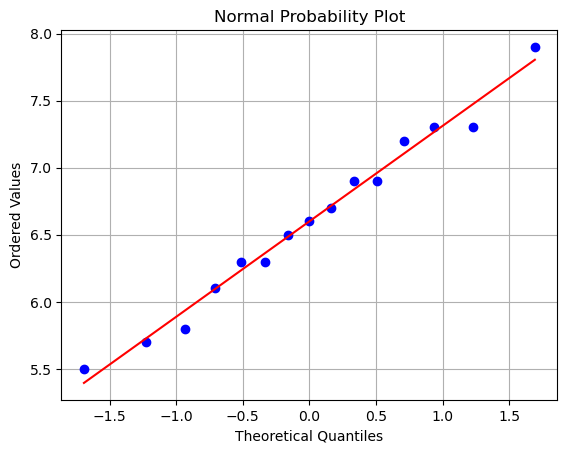

In [30]:
# test pH levels in lakes
# right-tailed test

# test for normality
fix, ax = plt.subplots()
stats.probplot(data, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)

# Shapiro-Wilk test for normality
# Null Hypothesis: data is normaly distributed
# p-value must be < 0.05 to reject the null and conclude the data is not distributed. 
shapiro_test = stats.shapiro(data)
shapiro_wilks_p_value = shapiro_test[1] # only return the p-value
shapiro_wilks_p_value = round(shapiro_wilks_p_value,4)
print(shapiro_wilks_p_value)

# interpretation
# data is normally distributed: 
# 1) p-value of 0.967 > 0.05 so fail to reject the null that the data is normally distributed
# 2) QQ plot visually confirmed

In [52]:
# test pH levels in lakes
# right-tailed test


# manually calculate the t-statistic 
t_stat  = (x_bar - mu_0) / (sample_std/np.sqrt(n))
t_stat = round(t_stat,4)
print(f't-statistic: {t_stat}')

# critical value test
critical_value_right = stats.t.ppf(1 - alpha, df)
critical_value_right = round(critical_value_right,4)
print(f'critical value: {critical_value_right}','\n')

# calculate the p-value for a right-tailed test
p_value = stats.t.cdf(t_stat,df=n-1)
right_p_value = 1 - p_value
right_p_value = round(right_p_value,4)

print(f'level of significance: {alpha}')
print(f'p-value: {right_p_value}')

# interpretation
# reject the null - test results are significant at the 5% level

t-statistic: 3.458
critical value: 1.7613 

level of significance: 0.05
p-value: 0.0019


0.7412


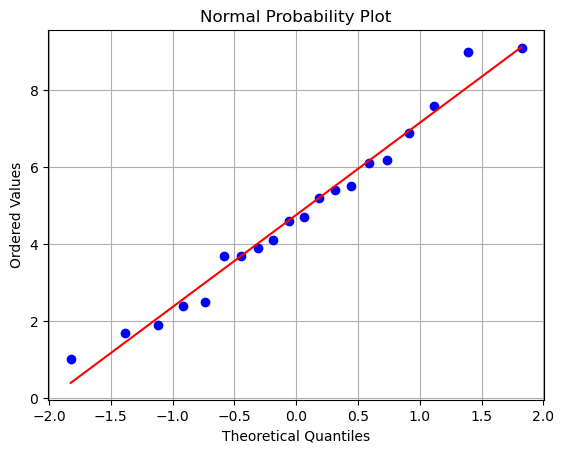

In [3]:
# TV Viewing
# two-tailed test
data = np.array([1.0, 4.6, 5.4, 3.7, 5.2, 1.7, 6.1, 1.9, 7.6, 9.1, 6.9, 5.5, 9.0, 3.9, 2.5, 2.4, 4.7, 4.1, 3.7, 6.2])

# test for normality
fix, ax = plt.subplots()
stats.probplot(data, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)

shapiro_test = stats.shapiro(data)
shapiro_p_value = shapiro_test[1]
shapiro_p_value = round(shapiro_p_value,4)
print(shapiro_p_value)


In [4]:
# TV Viewing
mu = 4.55
s  = 2.297
n = len(data)
alpha = 0.10
df = n-1
x_bar = np.average(data)
t_stat =(x_bar - mu) / (s/np.sqrt(n))
t_stat = round(t_stat,4)
t_stat

0.4089

In [7]:
# TV Viewing
critical_value = stats.t.ppf(1 - alpha/2,df)
critical_value
critical_value = round(critical_value,4)
critical_value

1.7291

In [10]:
# TV Viewing
p_value_two_tailed = 2 * (1 - stats.t.cdf(abs(t_stat),df))
p_value_two_tailed
p_value_two_tailed = round(p_value_two_tailed,4)
p_value_two_tailed

0.6872